In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from pyvis.network import Network
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Loading Data
df = pd.read_csv(r"covid_df.csv")

In [3]:
# Preprocessing Data
df.columns = df.columns.str.strip().str.lower()  # Cleaning column names
df["weight"] = df.groupby(["source", "target"])["source"].transform("count")  # Calculating edge weights
df_weighted = df.drop_duplicates(subset=["source", "target"]).reset_index(drop=True)  # Dropping duplicate edges
df_weighted = df_weighted[df_weighted["source"] != df_weighted["target"]]  # Removing self-loops

In [4]:
df_weighted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, 1 to 725
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  707 non-null    object
 1   target  707 non-null    object
 2   weight  707 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 22.1+ KB


In [5]:
df_weighted.head(10)

source          target  weight
1        Thailand           China      20
2         Vietnam           China       8
3           China           Japan      56
4           China   United States      30
6           China       Singapore      48
7           China     South Korea      24
8           China        Malaysia      13
9          France  United Kingdom       4
10          China  United Kingdom       2
11  United States           Japan       6

In [6]:
# Creating Network Graph
G = nx.from_pandas_edgelist(df_weighted, "source", "target", ["weight"], create_using=nx.DiGraph())

In [7]:
# Removing Isolated Nodes
isolates = list(nx.isolates(G))
G.remove_nodes_from(isolates)

In [8]:
# Applying Threshold (to filter out weak edges)
threshold = 2
df_filtered = df_weighted[df_weighted["weight"] >= threshold]

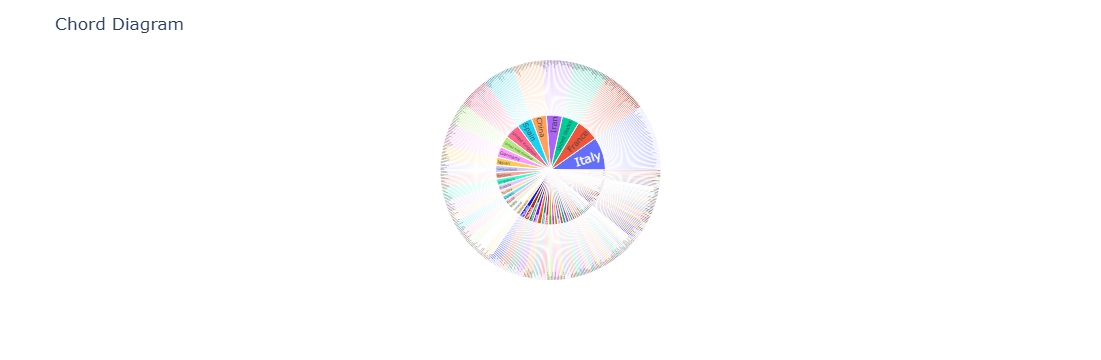

In [9]:
# Chord Diagram (using Plotly for interactive plot)
def plot_chord_diagram(df):
    chord_data = df.groupby(['source', 'target']).size().reset_index(name='weight')
    fig = px.sunburst(chord_data, path=['source', 'target'], values='weight')
    fig.update_layout(title='Chord Diagram')
    fig.show()

plot_chord_diagram(df_filtered)

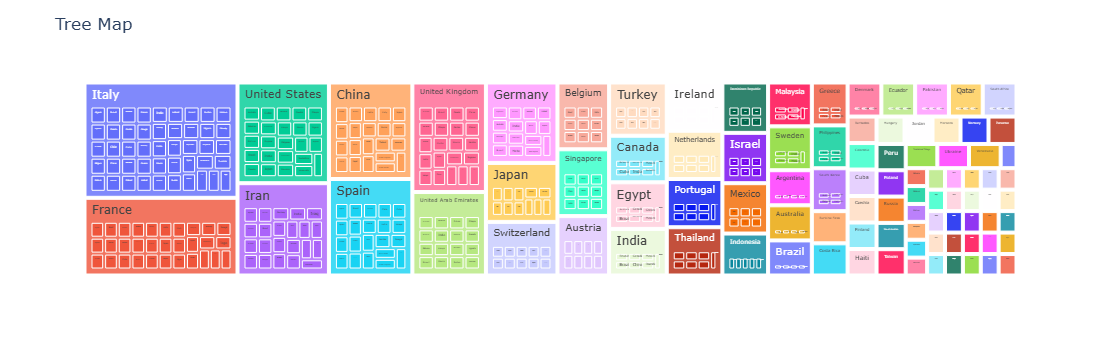

In [10]:
# Tree Map (using Plotly)
def plot_tree_map(df):
    tree_data = df.groupby(['source', 'target']).size().reset_index(name='weight')
    fig = px.treemap(tree_data, path=['source', 'target'], values='weight')
    fig.update_layout(title='Tree Map')
    fig.show()

plot_tree_map(df_filtered)

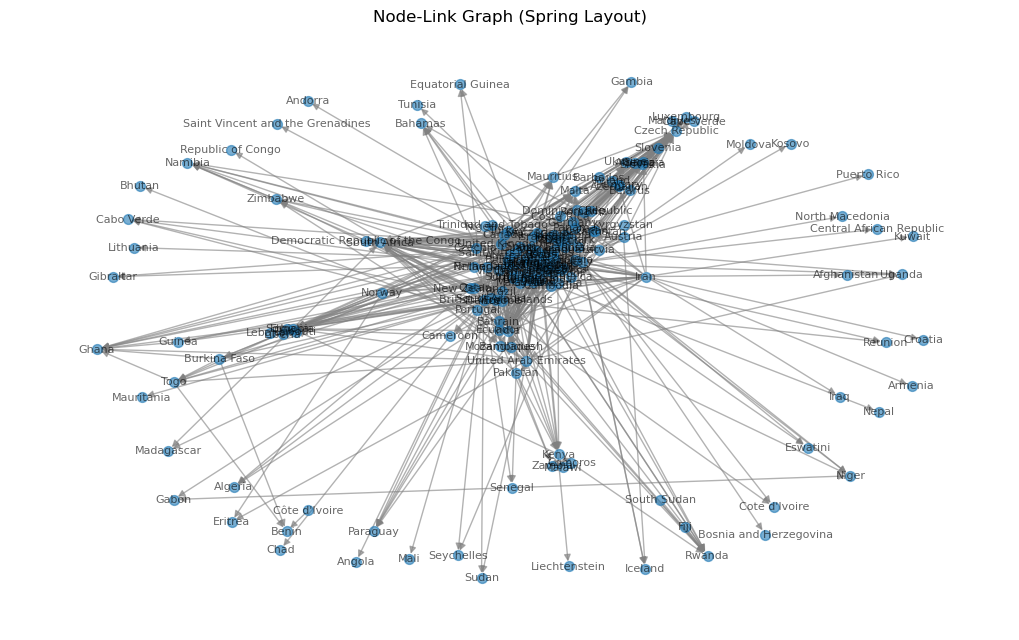

In [11]:
# Node-Link Graph (Spring Layout)
def plot_node_link_graph(G):
    pos = nx.spring_layout(G)  # Spring (Force-Directed) layout
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, node_size=50, edge_color="gray", alpha=0.6, with_labels=True, font_size=8)
    plt.title("Node-Link Graph (Spring Layout)")
    plt.show()

plot_node_link_graph(G)

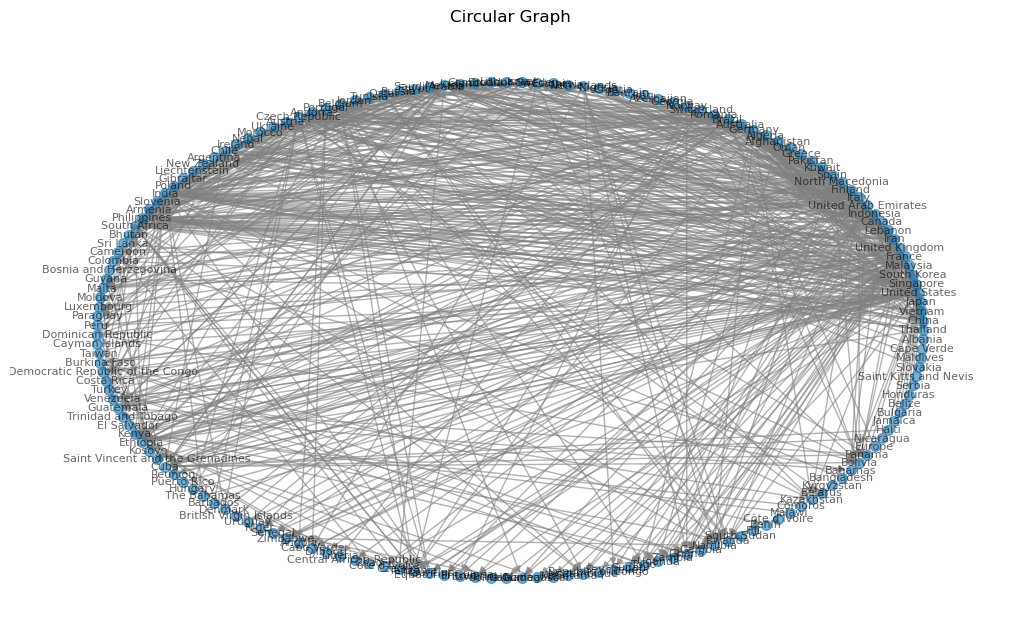

In [12]:
# Circular Graph (Circular Layout)
def plot_circular_graph(G):
    pos = nx.circular_layout(G)  # Circular layout
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, node_size=50, edge_color="gray", alpha=0.6, with_labels=True, font_size=8)
    plt.title("Circular Graph")
    plt.show()

plot_circular_graph(G)

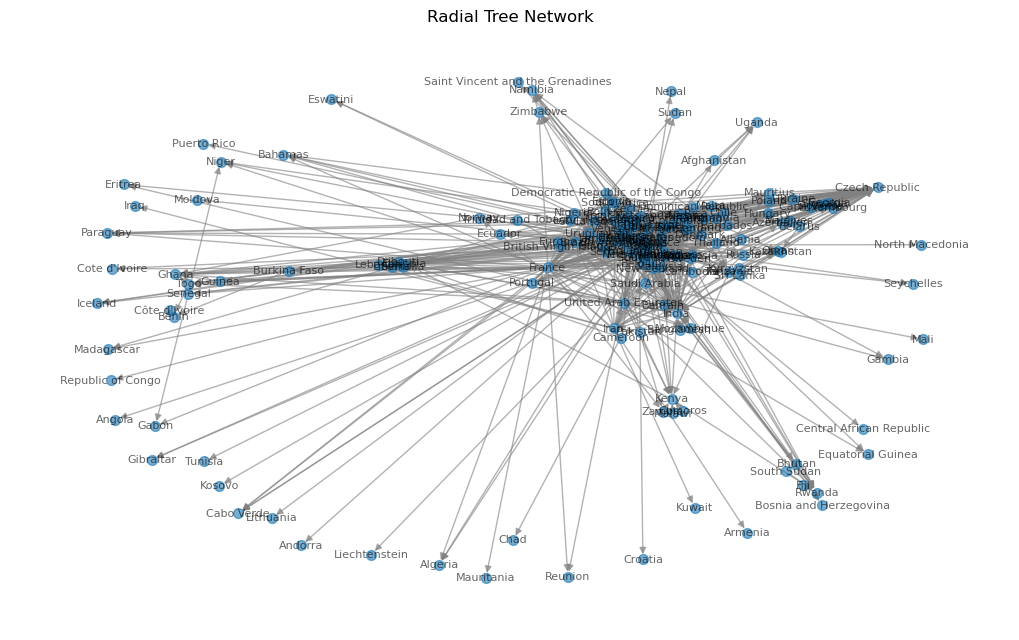

In [13]:
# Radial Tree Network (Using Spring Layout as a workaround for radial structure)
def plot_radial_tree(G):
    pos = nx.spring_layout(G, seed=42) 
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, node_size=50, edge_color="gray", alpha=0.6, with_labels=True, font_size=8)
    plt.title("Radial Tree Network")
    plt.show()

plot_radial_tree(G)

In [14]:
# Computing Node Properties (Degree Centrality, Betweenness, Closeness, PageRank)
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, weight="weight")
closeness_centrality = nx.closeness_centrality(G)
pagerank = nx.pagerank(G, weight="weight")

In [15]:
# Computing Network Properties (Density, Clustering Coefficient, Connected Components)
density = nx.density(G)
clustering_coefficient = nx.average_clustering(G.to_undirected())  
connected_components = nx.number_connected_components(G.to_undirected())

print(f"Network Density: {density:.4f}")
print(f"Average Clustering Coefficient: {clustering_coefficient:.4f}")
print(f"Connected Components: {connected_components}")

Network Density: 0.0255
Average Clustering Coefficient: 0.4099
Connected Components: 1


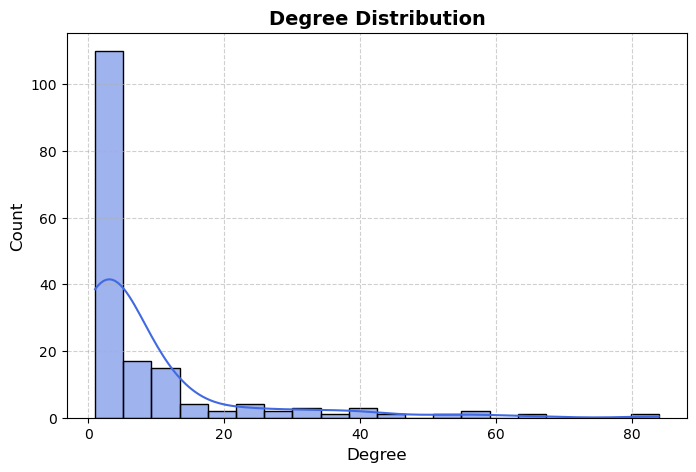

In [16]:
# Degree Distribution Plot
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

plt.figure(figsize=(8, 5))
sns.histplot(degree_sequence, bins=20, kde=True, color="royalblue")
plt.title("Degree Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()